###HW 10 CLUSTERING BUSINESS
###cluster time trends in NYC businesses:

In [1]:
%pylab inline
import numpy as np
import matplotlib as plt
import pylab as pl
import pandas as pd
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans
import json
import os
import geojson as gj
import zipfile
#import dataframe as df
import statsmodels.api as sm
import matplotlib.font_manager as fm

from statsmodels.graphics.api import qqplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Dont use for some time 
fileOpen = open('nyc-zip-code-tabulation-areas-polygons.geojson')
#readFile = fileOpen.read(); # read contents of 'f' into a string
data = gj.load(fileOpen)

In [3]:
zipJson =[]
fileOpen = open('nyc-zip-code-tabulation-areas-polygons.geojson')
#readFile = fileOpen.read(); # read contents of 'f' into a string
gjdata = gj.load(fileOpen)



In [4]:
gjdata['features'][1]['properties']['postalCode']
fileList =[]

In [5]:
#Create a data frame for the postal codes that will be merge with the business datafram.
zipData=[]
for i in range(len(gjdata['features'])):
    zipData.append(gjdata['features'][i]['properties']['postalCode'])

In [6]:
zipData = pd.DataFrame(zipData, columns=['ZIP'])
zipData.head()
zipData['num']=zipData.index
print zipData.head()

     ZIP  num
0  11372    0
1  11004    1
2  11040    2
3  11426    3
4  11365    4


In [7]:
for y in range(1,10):
    fname='zbp0%stotals.zip' %(y)
    zf = zipfile.ZipFile(fname)
    data[y] = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    #print data[20+y].info
    fileList.append('data[%d]' %(y))

In [8]:
for y in range(10,14):
    fname='zbp%stotals.zip' %(y)
    zf = zipfile.ZipFile(fname)
    data[y] = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    #print data[20+y].info
    fileList.append('data[%d]' %(y))

In [9]:
for y in range(94,100):
    fname='zbp%stotals.zip' %(y)
    zf = zipfile.ZipFile(fname)
    data[y] = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    #print data[20+y].info
    fileList.append('data[%d]' %(y))

In [10]:
for y in range(0,1):
    fname='zbp0%stotals.zip' %(y)
    zf = zipfile.ZipFile(fname)
    data[y] = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    #print data[20+y].info
    fileList.append('data[%d]' %(y))

In [11]:
print len(data['features'])

262


In [12]:
for i in range(len(data['features'])):
    (data['features'][i]['properties']['postalCode'])

In [13]:
data[2].columns = map(str.lower, data[2].columns)
data2 = pd.DataFrame({'ZIP':data[2].zip,'2002':data[2].est})
data[1].columns = map(str.lower, data[1].columns)
data1 = pd.DataFrame({'ZIP':data[1].zip,'2001':data[1].est})
data[3].columns = map(str.lower, data[3].columns)
data3 = pd.DataFrame({'ZIP':data[3].zip,'2003':data[3].est})
data[4].columns = map(str.lower, data[4].columns)
data4 = pd.DataFrame({'ZIP':data[4].zip,'2004':data[4].est})

data[5].columns = map(str.lower, data[5].columns)
data5 = pd.DataFrame({'ZIP':data[5].zip,'2005':data[5].est})
data[6].columns = map(str.lower, data[6].columns)
data6 = pd.DataFrame({'ZIP':data[6].zip,'2006':data[6].est})
data[7].columns = map(str.lower, data[7].columns)
data7 = pd.DataFrame({'ZIP':data[7].zip,'2007':data[7].est})
data[8].columns = map(str.lower, data[8].columns)
data8 = pd.DataFrame({'ZIP':data[8].zip,'2008':data[8].est})
data[9].columns = map(str.lower, data[9].columns)
data9 = pd.DataFrame({'ZIP':data[9].zip,'2009':data[9].est})
data[10].columns = map(str.lower, data[10].columns)
data10 = pd.DataFrame({'ZIP':data[10].zip,'2010':data[10].est})
data[11].columns = map(str.lower, data[11].columns)
data11 = pd.DataFrame({'ZIP':data[11].zip,'2011':data[11].est})
data[12].columns = map(str.lower, data[12].columns)
data12 = pd.DataFrame({'ZIP':data[12].zip,'2012':data[12].est})
data[13].columns = map(str.lower, data[13].columns)
data13 = pd.DataFrame({'ZIP':data[13].zip,'2013':data[13].est})


data[94].columns = map(str.lower, data[94].columns)
data94 = pd.DataFrame({'ZIP':data[94].zip,'1994':data[94].est})
data[95].columns = map(str.lower, data[95].columns)
data95 = pd.DataFrame({'ZIP':data[95].zip,'1995':data[95].est})
data[96].columns = map(str.lower, data[96].columns)
data96 = pd.DataFrame({'ZIP':data[96].zip,'1996':data[96].est})
data[97].columns = map(str.lower, data[97].columns)
data97 = pd.DataFrame({'ZIP':data[97].zip,'1997':data[97].est})
data[98].columns = map(str.lower, data[98].columns)
data98 = pd.DataFrame({'ZIP':data[98].zip,'1998':data[98].est})
data[99].columns = map(str.lower, data[99].columns)
data99 = pd.DataFrame({'ZIP':data[99].zip,'1999':data[99].est})
data[0].columns = map(str.lower, data[0].columns)
data0 = pd.DataFrame({'ZIP':data[0].zip,'2000':data[0].est})

In [14]:
dfs=[]
for i in range(0,14):
    dfs.append('data%s'%(i))


In [15]:

for i in range(94,100):
    dfs.append('data%s'%(i))

In [16]:
dfs=[data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data94,data95,data96,data97,data98,data99]

In [17]:
dataAll = reduce(lambda left,right: pd.merge(left,right,on='ZIP'), dfs)


In [18]:
print len(dataAll)

35954


In [19]:
#type(zipData)
print 'Before ',zipData['ZIP'].dtype
zipData['ZIP'] = (zipData['ZIP']).astype(int)
print 'After ',zipData['ZIP'].dtype


Before  object
After  int64


In [20]:
dataFinal = pd.merge(dataAll,zipData,how ='inner',on='ZIP')

In [21]:
dataFinal = pd.merge(dataAll,zipData,how ='inner',on='ZIP')

In [22]:
allSum = np.nansum(np.nansum(dataFinal,axis=0), axis=0)

In [23]:
dataFinal = dataFinal.sort_index(axis=1)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


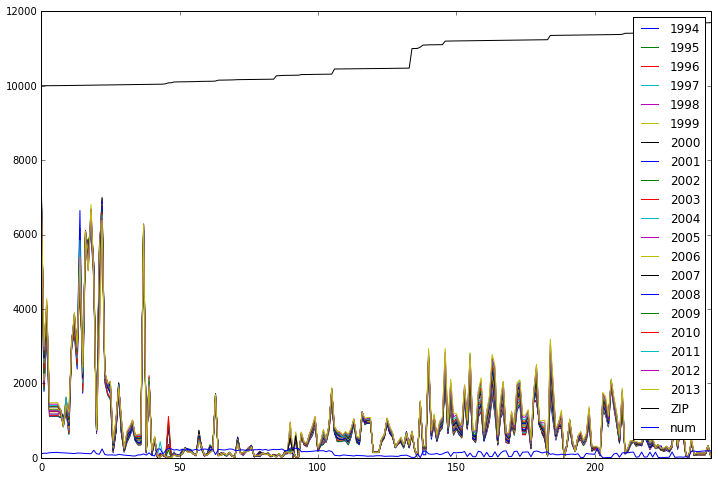

In [24]:
#Preliminary plot of dataFinal data frame.
%pylab inline
dataFinal.plot(figsize=(12,8));

In [25]:
dataFinal.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003 ...   2006  \
0  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084 ...   7415   
1  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402 ...   2686   
2  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704 ...   3909   
3  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252 ...   1311   
4  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252 ...   1311   

   2007  2008  2009  2010  2011  2012  2013    ZIP  num  
0  7549  7472  7305  7241  7227  7235  7273  10001  113  
1  2685  2691  2775  2872  2912  2954  2988  10002  123  
2  4049  4071  4099  4113  4159  4214  4277  10003  121  
3  1370  1376  1379  1398  1404  1442  1479  10004  138  
4  1370  1376  1379  1398  1404  1442  1479  10004  141  

[5 rows x 22 columns]

/Users/svarmit/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


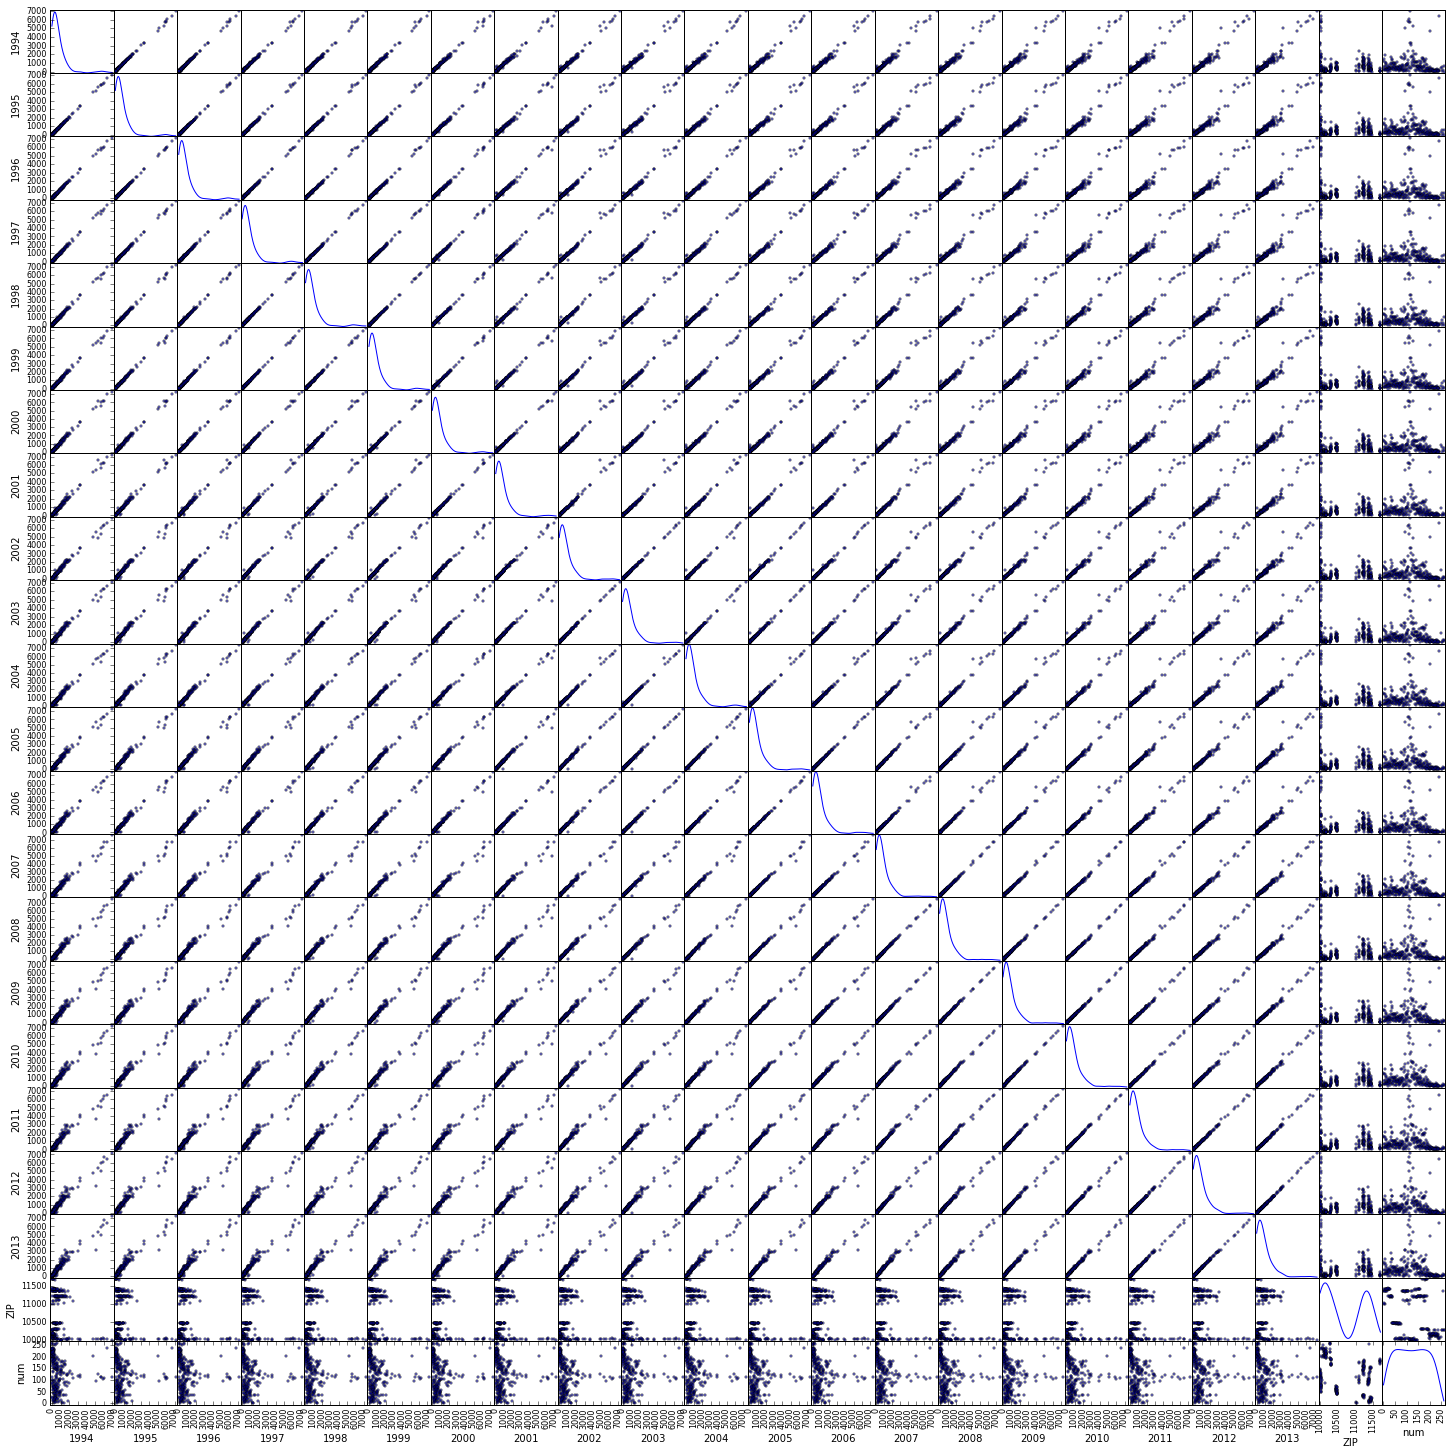

In [26]:
#Tovisualize data better
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataFinal, figsize=(25,25), diagonal="density");


/Users/svarmit/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


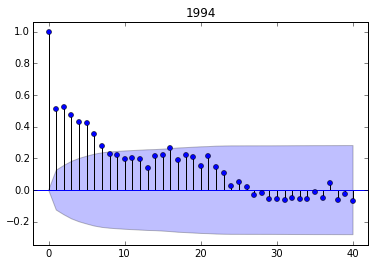

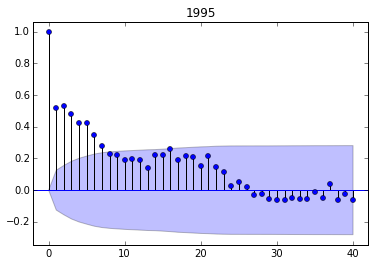

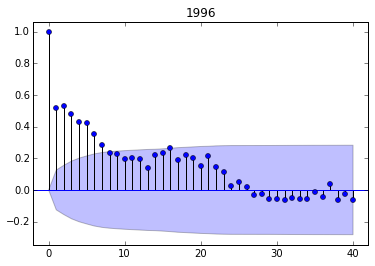

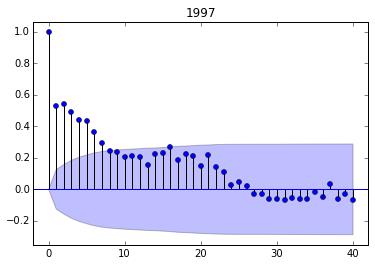

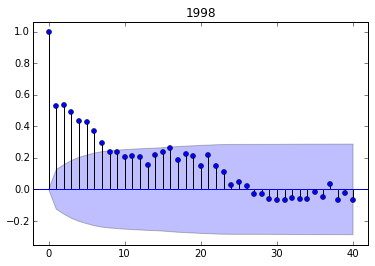

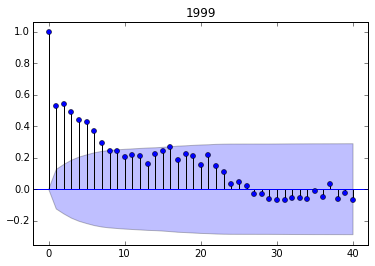

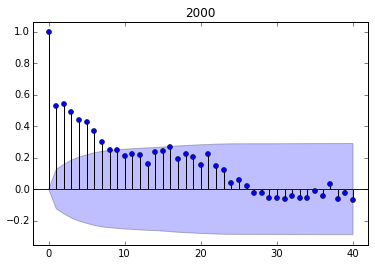

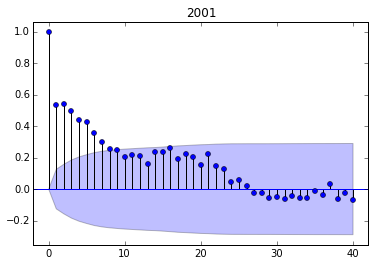

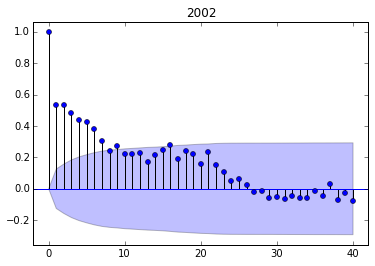

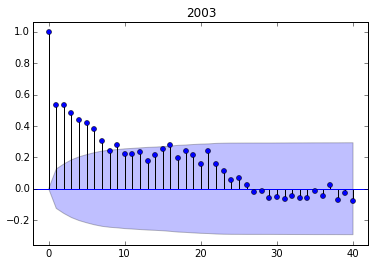

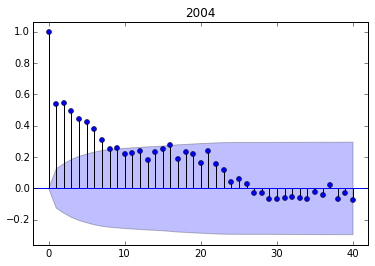

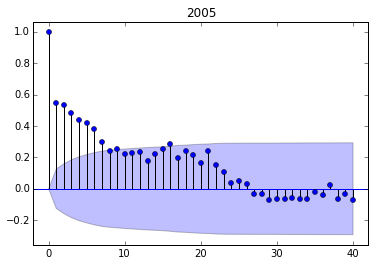

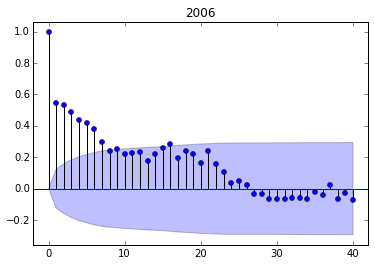

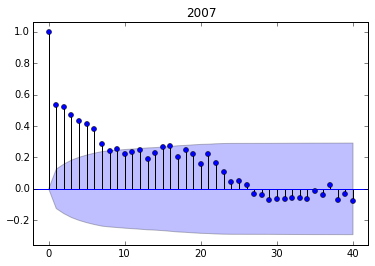

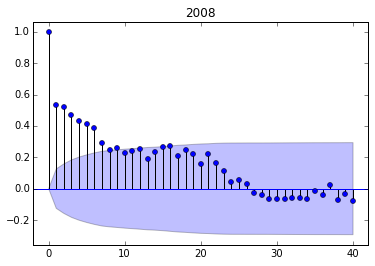

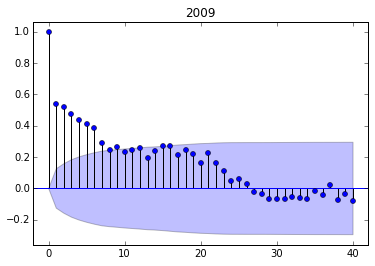

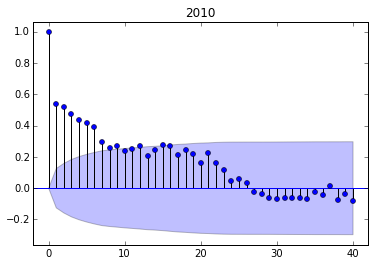

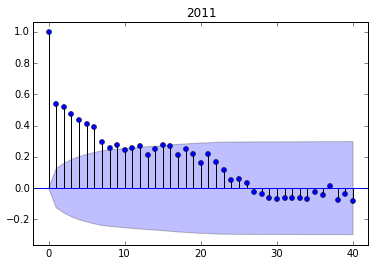

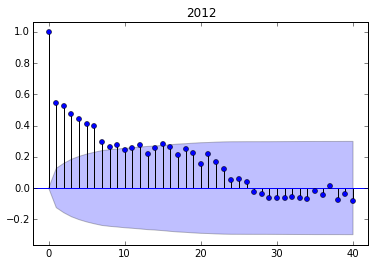

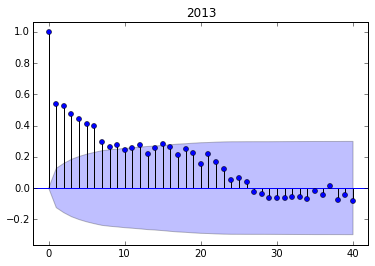

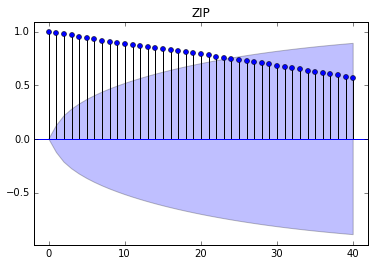

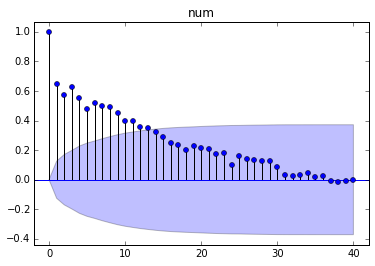

In [27]:
for i in list(dataFinal.columns.values):
    sm.graphics.tsa.plot_acf(dataFinal[i].values.squeeze(), lags=40)
    pl.title(i)

In [28]:
# define the font styles
import matplotlib.font_manager as fm
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [29]:
dataFinal.head()
newData=dataFinal.set_index(dataFinal.ZIP)

In [30]:
newData = newData.drop(['num'],axis=1)
newData = newData.drop(['ZIP'],axis=1)

In [31]:
newData.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
ZIP                                                                             
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084  7370  7312   
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402  2551  2682   
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704  3776  3867   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   

       2006  2007  2008  2009  2010  2011  2012  2013  
ZIP                                                    
10001  7415  7549  7472  7305  7241  7227  7235  7273  
10002  2686  2685  2691  2775  2872  2912  2954  2988  
10003  3909  4049  4071  4099  4113  4159  4214  4277  
10004  1311  1370  1376  1379  1398  1404  1442  1479  
10004  1311  1370  1376  1379  1398  1404  1442  1479

In [32]:
for i in newData.columns.values:
    df1 = newData[np.isnan(newData[i])]
print df1

Empty DataFrame
Columns: [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
Index: []


In [33]:
# Normalizing the data
newData = newData.copy()
for i in range(len(newData)):
    newData.iloc[i] = (newData.iloc[i]-np.nanmean(newData.iloc[i]))/np.nanstd(newData.iloc[i])

In [34]:
#Checking the nan and infinite values if any
for i in newData.index:
    for j in newData.columns.values:
        if newData[j].any() =='Nan':
            print 'yes'
#newData1=newData.drop(newData[isnan])

In [35]:
# checking the standard deviation and mean
print("STD = {0}".format(np.std(newData.loc[10005])))
print("MEAN = {0:.2f}".format(np.mean(newData.loc[10005])))

STD = 1.0
MEAN = -0.00


In [36]:
newData = newData.dropna()


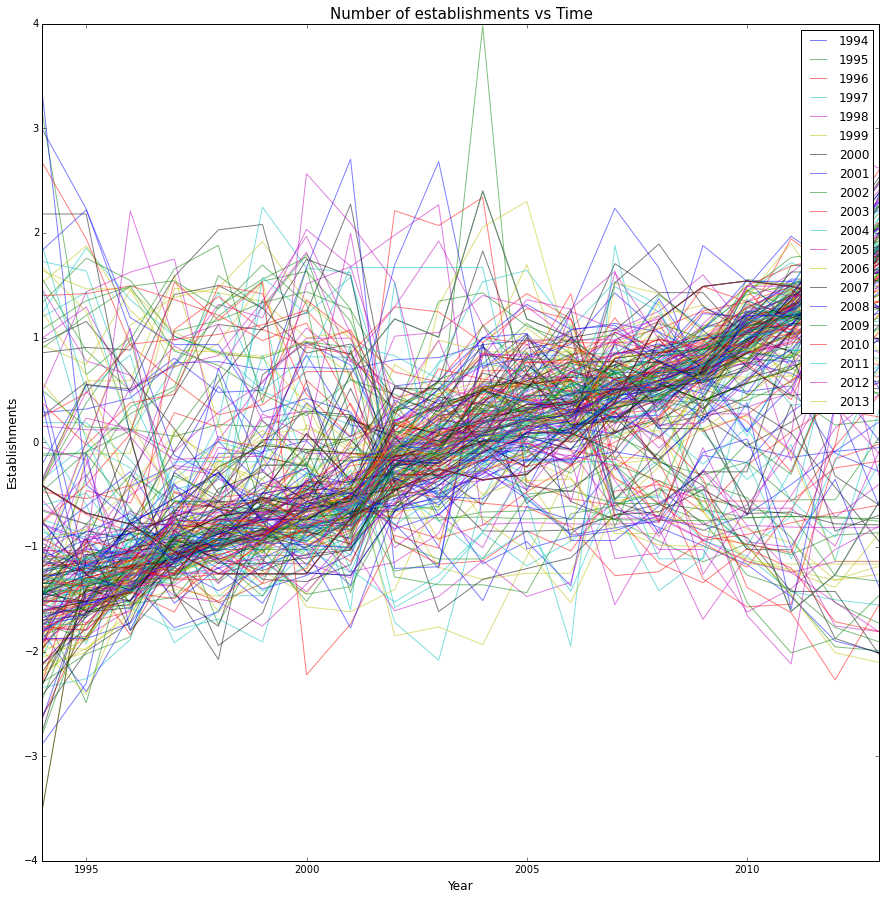

In [37]:
#Plotting the time series
title = 'Number of establishments vs Time'
xlabel = 'Year'
ylabel = 'Establishments'

pl.figure(figsize=(15,15))
pl.xlim(1994,2013)
pl.title(title, fontproperties=title_font)
pl.xlabel(xlabel, fontproperties=label_font)
pl.ylabel(ylabel, fontproperties=label_font)
#pl.ticks(range(20), years);
for i in range(len(newData)):
    pl.plot(newData.iloc[i].index, newData.iloc[i], '-', alpha=0.5)
    pl.legend(newData.iloc[i].index)

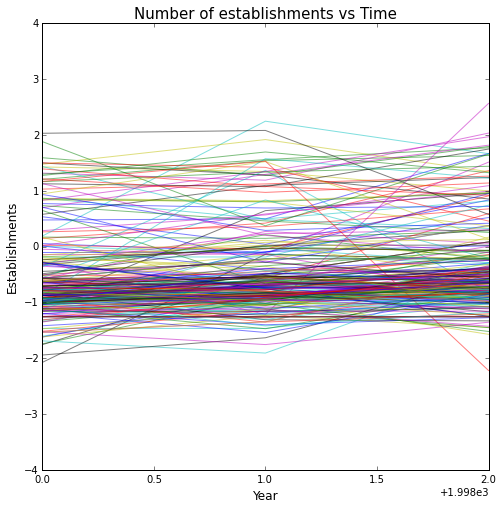

In [38]:
#Zooming in to 2 years to visualize the trend --just for experiment
plt.figure(figsize=(8,8))
plt.xlim(1998,2000)
pl.title(title, fontproperties=title_font)
pl.xlabel(xlabel, fontproperties=label_font)
pl.ylabel(ylabel, fontproperties=label_font)
for i in range(len(newData)):
    plt.plot(newData.iloc[i].index, newData.iloc[i], '-', alpha=0.5)

### Clustering using KMeans and Plotting the data


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.patches as mpatches
from descartes import PolygonPatch
import json

n_c=6

In [40]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]
import matplotlib.patches as mpatches

##KMean Cluster

/Users/svarmit/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


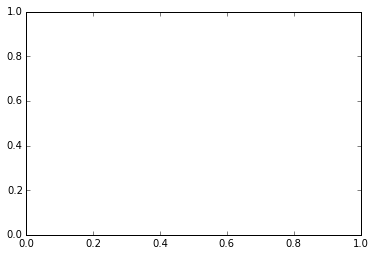

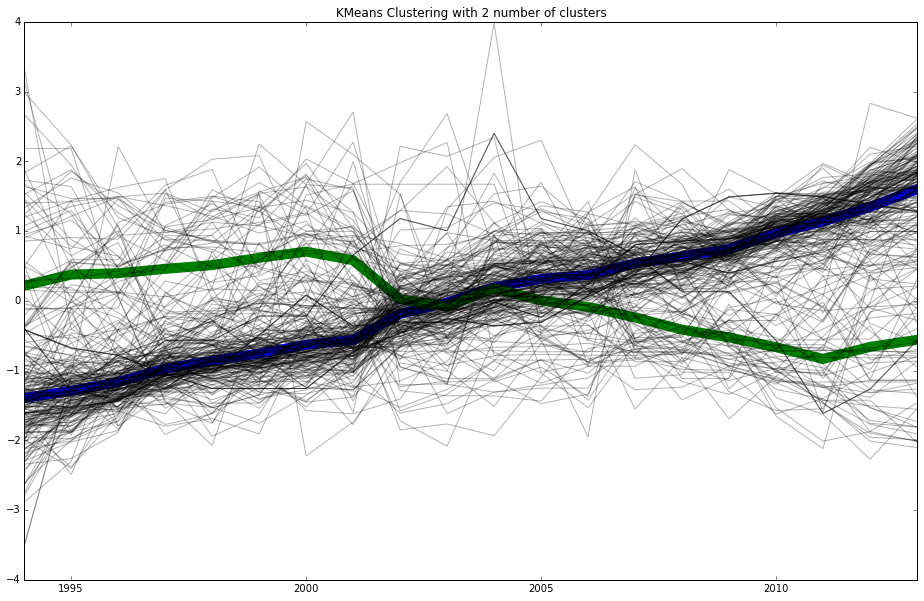

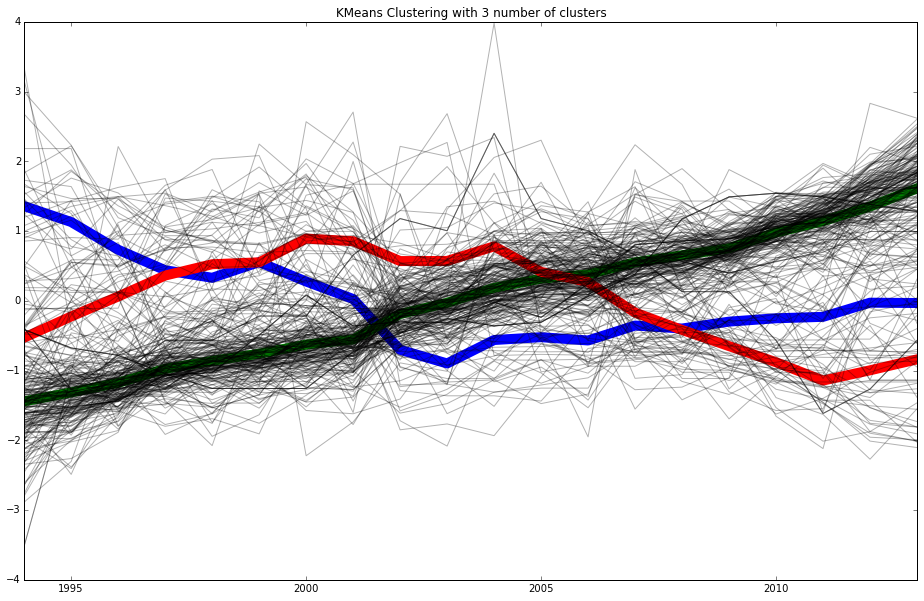

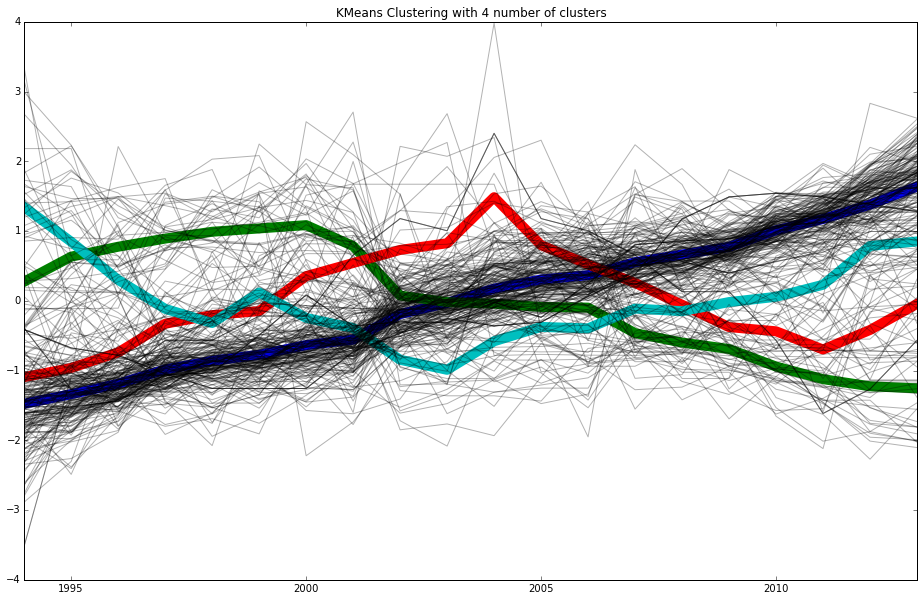

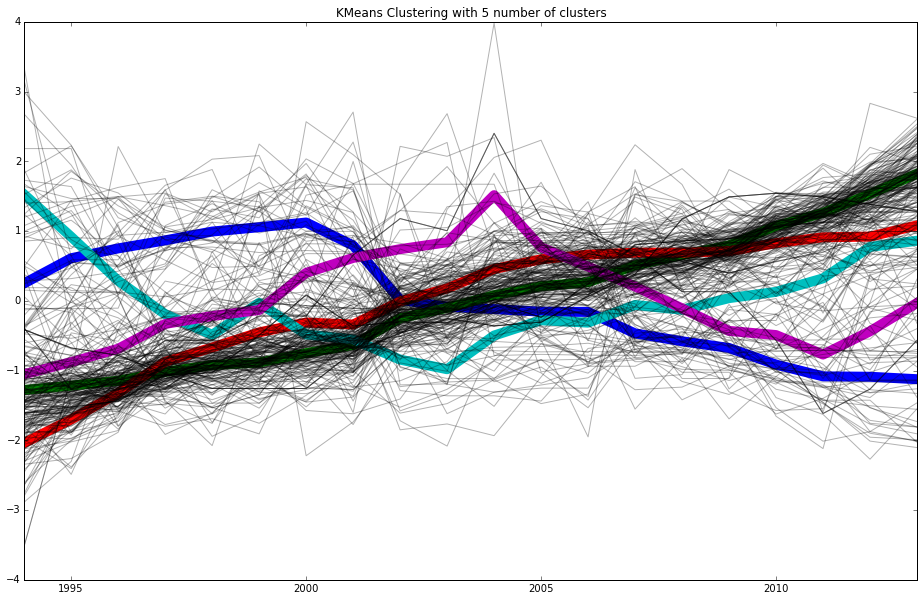

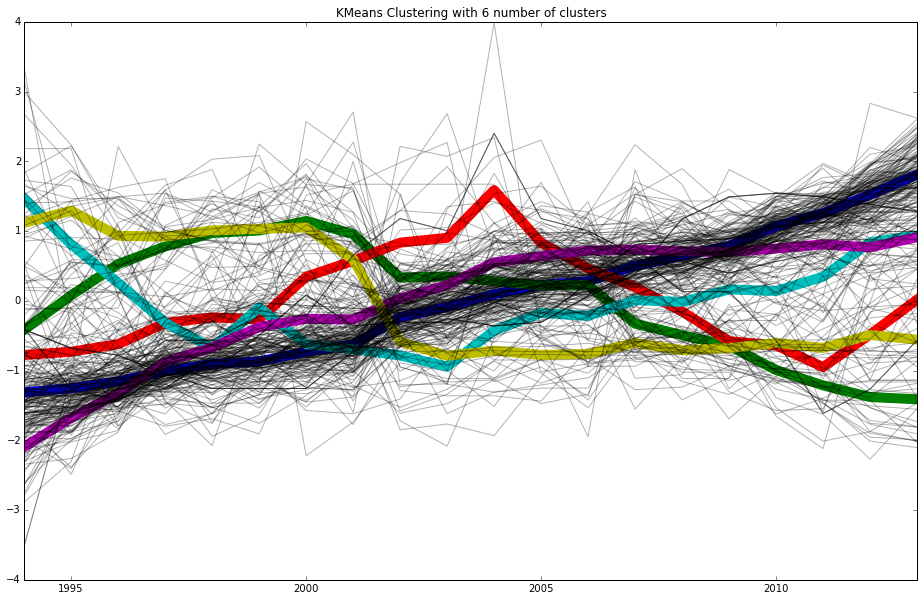

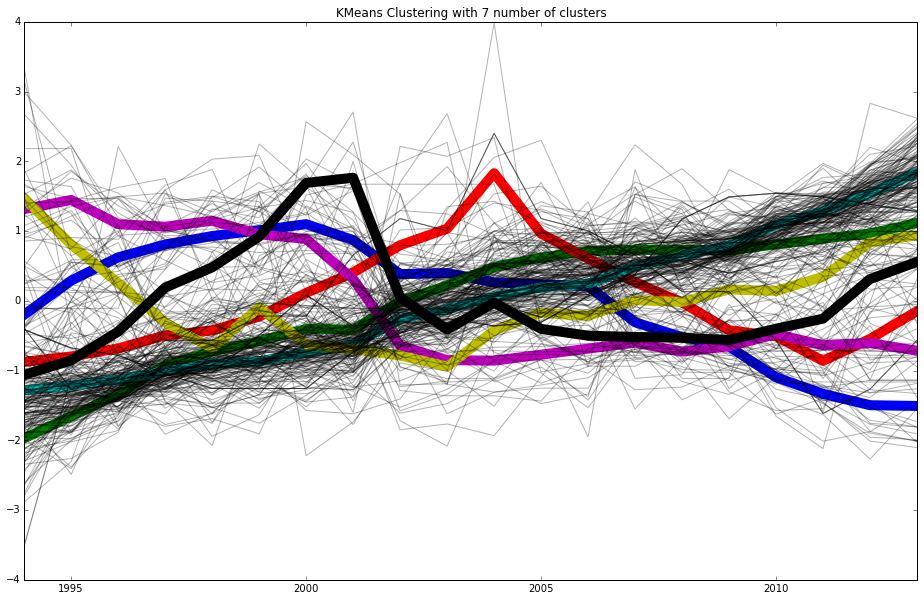

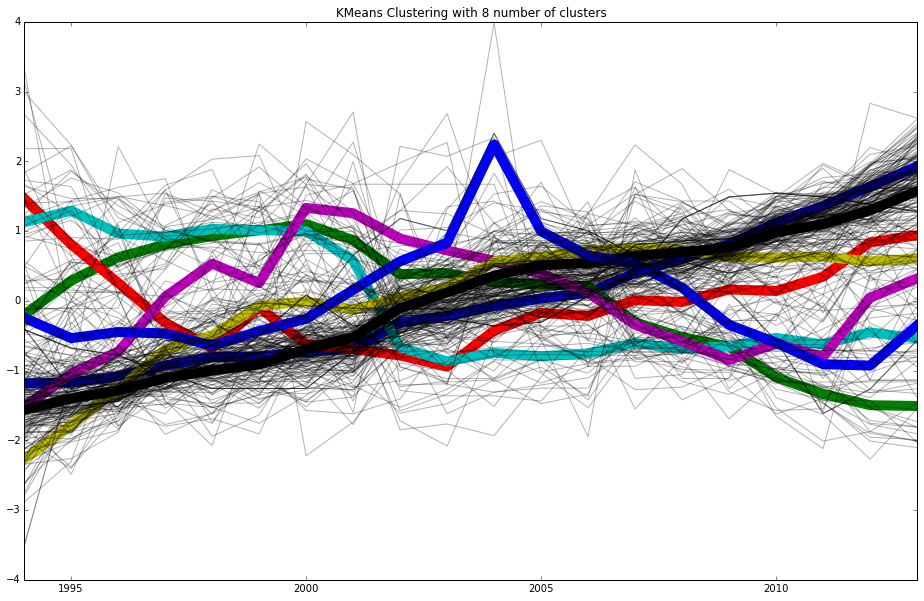

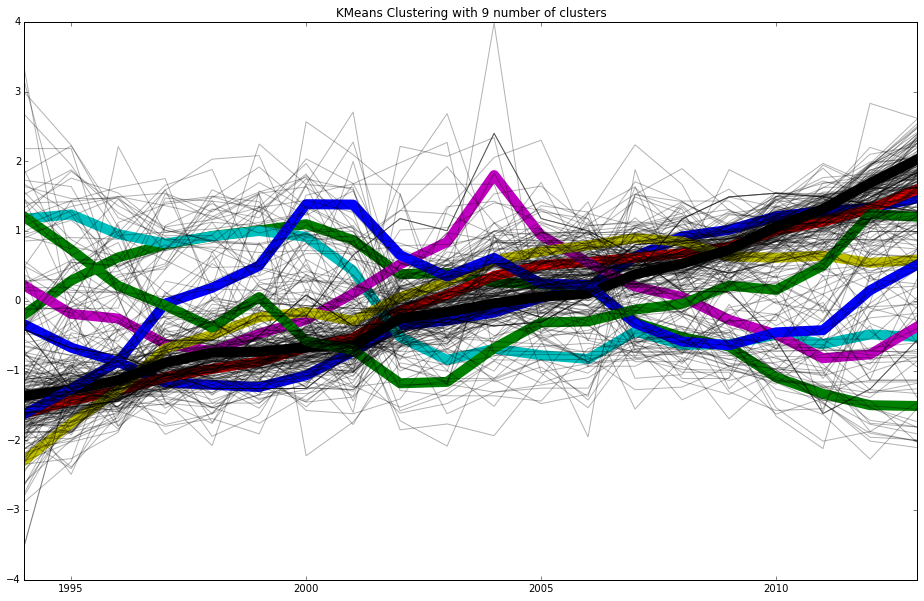

In [41]:
silhouette_scores = {}
for n_c in range(2,10):
    kmeans = sklearn.cluster.KMeans(n_clusters=n_c)
    kmeans.fit(newData.values)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    silhouette_avg = silhouette_score(newData.values, kmeans.labels_)
    silhouette_scores[n_c] = silhouette_avg   
    plt.legend()
    plt.figure(figsize=(16,10))
    plt.title('KMeans Clustering with %s number of clusters'%(n_c))
    plt.xlim(1994,2013)
    for i in range(len(centers)):
        plt.plot(range(1994,2014),centers[i],linewidth=10) 
    for i in range(len(newData)):
        plt.plot(newData.iloc[i].index, newData.iloc[i],'k',alpha=0.3)

In [42]:
for sc in silhouette_scores:
    print('For {0} number of centerters  silhouette value={1}'.format(sc, silhouette_scores[sc]))

For 2 number of centerters  silhouette value=0.561053058718
For 3 number of centerters  silhouette value=0.53781782352
For 4 number of centerters  silhouette value=0.493054997188
For 5 number of centerters  silhouette value=0.236271056094
For 6 number of centerters  silhouette value=0.266110112536
For 7 number of centerters  silhouette value=0.216518356671
For 8 number of centerters  silhouette value=0.145519756462
For 9 number of centerters  silhouette value=0.142342373818


The biggest Silhouette value is of cluster 2 that is 0.561

##Cluster plotting on NYC MAP

In [43]:
import geopandas as gpd

In [44]:
# For agglomerative clusterin
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5, compute_full_tree=True).fit(dataFinal.values)
labelsAgg = agc.labels_



In [45]:
geoJson = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
geoJson['ZIP'] = geoJson['postalCode'].astype(float)
geoJson.head()


@id  BLDGpostalCode CTY_FIPS  \
0  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
1  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
2  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
3  http://nyc.pediacities.com/Resource/PostalCode...               0      081   
4  http://nyc.pediacities.com/Resource/PostalCode...               0      081   

   OBJECTID          PO_NAME STATE ST_FIPS      Shape_Area    Shape_Leng  \
0         1  Jackson Heights    NY      36  20163283.87440  20624.692317   
1         2        Glen Oaks    NY      36  22606526.91390  23002.816039   
2         3    New Hyde Park    NY      36   6269333.41234  15749.161511   
3         4        Bellerose    NY      36  49418364.05770  35932.810639   
4         5    Fresh Meadows    NY      36  69385865.59430  38693.565676   

  borough                                           geometry postalCode    ZIP  
0  Queens  POLYGON ((-73.86942457284175 40.74915687096787...      11372  11372  
1  Queens  POLYGON ((-73.71068374074007 40.75004039450917...      11004  11004  
2  Queens  POLYGON ((-73.70098278625547 40.73889569923034...      11040  11040  
3  Queens  POLYGON ((-73.72270447144122 40.75373371438336...      11426  11426  
4  Queens  POLYGON ((-73.81088634744755 40.72717187575918...      11365  11365

In [46]:
dataFinal['clusteragg']=labelsAgg
dataFinal['clusterkm']=labels

In [47]:
clusterAggArray = geoJson.join(dataFinal,rsuffix='ZIP',how='inner')

### Kmeans Cluster

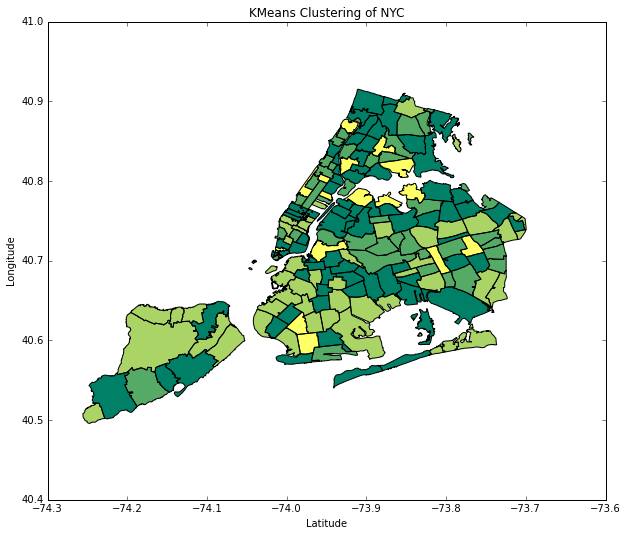

In [48]:
clusterAggArray.plot(column='clusterkm', scheme='QUANTILES', alpha=1, colormap='summer',figsize=(10,10))
pl.xlabel('Latitude')
pl.ylabel('Longitude')
pl.title('KMeans Clustering of NYC')
#mplleaflet.display(crs =hope.crs)

### Agglomerative Clustering

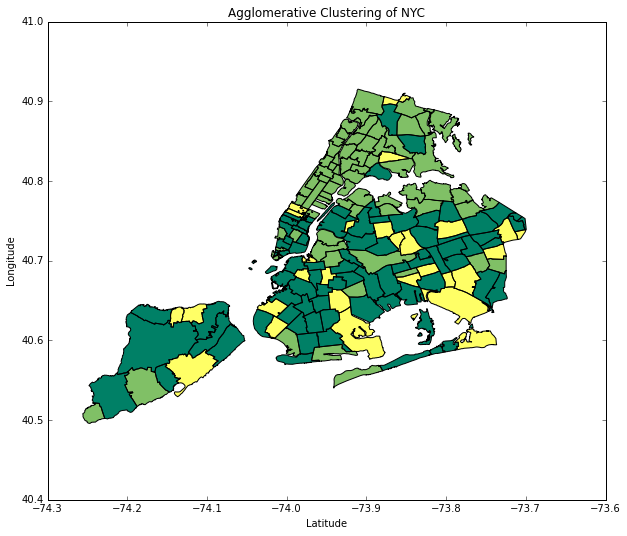

In [49]:
clusterAggArray.plot(column='clusteragg', scheme='QUANTILES', alpha=1, colormap='summer',figsize=(10,10))
pl.xlabel('Latitude')
pl.ylabel('Longitude')
pl.title('Agglomerative Clustering of NYC')
#mplleaflet.display(crs =hope.crs)

Interpretation.

On visualization of both the clusters Kmeand and Agglomerative areas of Brooklyn and Queens are the areas with the steady increas in establishments. Some of the areas of staten island have shown the unexpected change in both the clusters.
Both of the clusters have clusted in simmilar way except some areas near Long Island.d in K-means.